In [3]:
import pandas as pd
import numpy as np


In [4]:
bf_df = pd.read_csv('breakfast.csv')
l_df = pd.read_csv('lunch.csv')
d_df = pd.read_csv('dinner.csv')

Breakfast

In [23]:
bf_df.head()

,Unnamed: 0,Food_items,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,label
0,1,Avocados,160,15.0,2.0,0.55,12.0,7,485.0,8.5,6.7,0,0.7,1
1,2,Bananas,89,0.3,1.1,0.26,5.0,1,358.0,23.0,2.6,0,12.0,1
2,4,Berries,349,0.4,14.0,6.80,190.0,298,77.0,77.0,13.0,0,46.0,4
3,8,American cheese,331,24.0,20.0,0.84,497.0,966,363.0,8.3,0.0,0,0.0,2
4,9,Coffee,2,0.0,0.3,0.02,2.0,1,50.0,0.2,0.0,0,0.0,1


In [24]:
X_bf = bf_df.iloc[:, 2:-1]

In [14]:
from sklearn import preprocessing
X_bf = preprocessing.normalize(X_bf)
X_bf = np.array(X_bf)

In [15]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5, init='k-means++', 
                 max_iter=300, 
                 tol=0.0001, verbose=0, random_state=0, 
                 copy_x=True, algorithm='elkan').fit(X_bf)

In [17]:
from sklearn.metrics import silhouette_score

silhouette_score(X_bf, cluster.labels_, metric='euclidean')

0.33341138689863964

In [18]:
K = range(3,10)
fits = []
score = []
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k,init='k-means++', random_state = 0).fit(X_bf)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_bf, model.labels_, metric='euclidean'))

<AxesSubplot:>

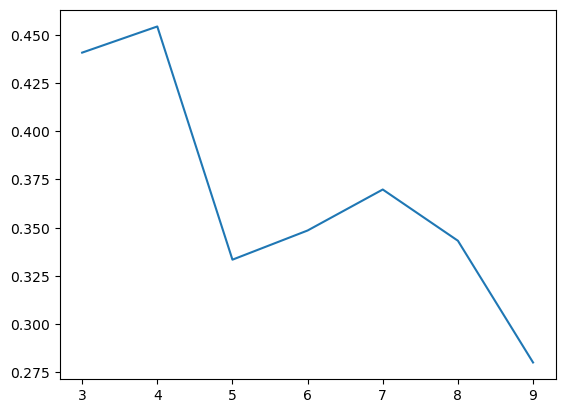

In [19]:
import seaborn as sns
sns.lineplot(x = K, y = score)

Lunch data

In [22]:
l_df.head()

,Unnamed: 0,Food_items,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,label
0,0,Asparagus Cooked,22,0.2,2.4,0.91,23.0,14,224.0,4.1,2.0,0,1.3,1
1,3,Bagels made in wheat,250,1.5,10.0,2.76,20.0,439,165.0,49.0,4.1,0,6.1,0
2,5,Brocolli,25,0.5,3.8,1.27,118.0,56,343.0,3.1,2.8,0,0.6,1
3,6,Brown Rice,362,2.7,7.5,1.80,33.0,4,268.0,76.0,3.4,0,0.0,4
4,7,Cauliflower,32,0.3,3.0,0.72,32.0,259,278.0,6.3,3.3,0,0.0,3


<AxesSubplot:>

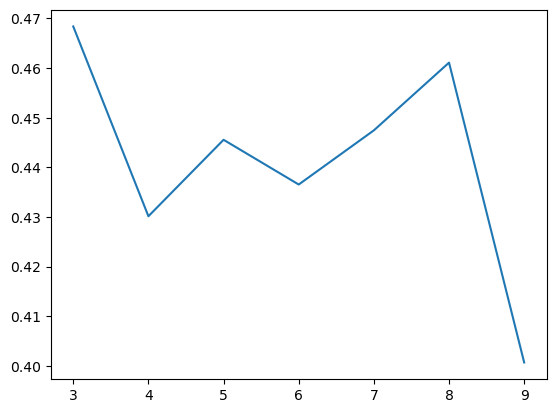

In [26]:
X_l = l_df.iloc[:, 2:-1]
X_l.head()
X_l = preprocessing.normalize(X_l)
X_l = np.array(X_l)
K = range(3,10)
fits = []
score = []
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k,init='k-means++', random_state = 0).fit(X_l)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_l, model.labels_, metric='euclidean'))
sns.lineplot(x = K, y = score)

Dinner

In [25]:
d_df.head()

,Unnamed: 0,Food_items,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,label
0,0,Asparagus Cooked,22,0.2,2.4,0.91,23.0,14,224.0,4.1,2.0,0,1.3,1
1,3,Bagels made in wheat,250,1.5,10.0,2.76,20.0,439,165.0,49.0,4.1,0,6.1,2
2,5,Brocolli,25,0.5,3.8,1.27,118.0,56,343.0,3.1,2.8,0,0.6,4
3,6,Brown Rice,362,2.7,7.5,1.80,33.0,4,268.0,76.0,3.4,0,0.0,1
4,7,Cauliflower,32,0.3,3.0,0.72,32.0,259,278.0,6.3,3.3,0,0.0,4


<AxesSubplot:>

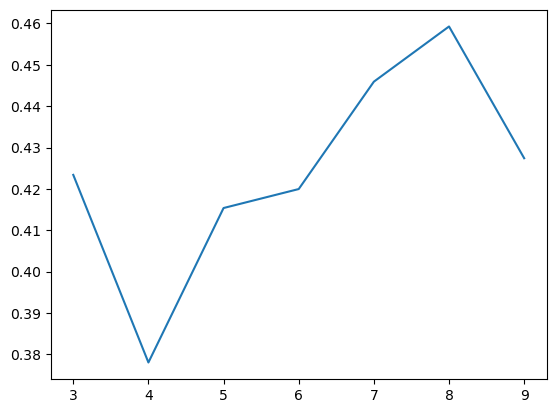

In [27]:
X_d = d_df.iloc[:, 2:-1]
X_d.head()
X_d = preprocessing.normalize(X_d)
X_d = np.array(X_d)
K = range(3,10)
fits = []
score = []
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k,init='k-means++', random_state = 0).fit(X_d)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_d, model.labels_, metric='euclidean'))
sns.lineplot(x = K, y = score)